In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt
import mpl_scatter_density

# Comparing catalogue (vG+2023)

In [2]:
df_vg =  pd.read_csv('Catalogues/NGC2539_vG2023+GaiaDR3.csv')
df_vg

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
0,5725183060454307840,122.543457,-13.441126,0.5316,-2.749,-0.215,19.453873,19.289522,18.325554,NGC_2539,...,NaN,NaN,NaN,NaN,122.543469,-13.441125,5.009369,3.603222,0.0699,0.0
1,5725182953073887360,122.514357,-13.457342,0.6788,-2.414,0.028,18.965633,19.964792,17.986687,NGC_2539,...,0.0486,0.0150,0.1002,PHOENIX,122.514368,-13.457342,3.510630,2.398008,0.0564,0.0
2,5725180723992144256,122.446022,-13.534858,0.7080,-2.336,-0.247,18.992800,19.908337,18.105816,NGC_2539,...,0.0138,0.0043,0.0281,MARCS,122.446032,-13.534857,3.623407,2.351267,0.0357,0.0
3,5725178696767530112,122.620965,-13.510299,0.6625,-2.193,-0.258,18.503292,19.363157,17.563908,NGC_2539,...,0.2539,0.2363,0.2768,MARCS,122.620975,-13.510297,2.765433,1.990795,0.0404,0.0
4,5725178314509097728,122.539048,-13.547586,0.7476,-1.777,-0.625,18.062864,18.826242,17.112633,NGC_2539,...,0.1028,0.0777,0.1289,PHOENIX,122.539056,-13.547583,1.923987,1.365186,0.0493,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,5725970276418851328,122.103406,-13.064577,0.7605,-2.301,-0.531,13.934523,14.170032,13.552169,NGC_2539,...,0.0923,0.0878,0.0962,A,122.103416,-13.064574,0.297504,0.191861,0.0588,0.0
1135,5725112794788207744,122.846499,-13.754821,0.7201,-1.988,-0.638,17.717495,18.519274,16.835249,NGC_2539,...,0.2831,0.2700,0.2987,PHOENIX,122.846508,-13.754818,1.612267,1.417754,0.0109,0.0
1136,5725107980125916416,122.916747,-13.856385,0.6776,-2.218,-0.192,15.150477,15.475309,14.663897,NGC_2539,...,0.0460,0.0417,0.0515,MARCS,122.916757,-13.856384,0.470797,0.366977,-0.0176,0.0
1137,5725191165050219392,122.131967,-13.494460,0.3708,-2.558,-0.637,19.609621,20.761806,18.539328,NGC_2539,...,NaN,NaN,NaN,NaN,122.131979,-13.494457,5.168311,4.066477,-0.1379,0.0


In [3]:
jj, = np.where(df_vg.Pmemb >= 0.7)
dfvg = df_vg.iloc[jj]

In [4]:
dfvg

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
11,5725169724574250368,122.436369,-13.687641,0.7825,-2.457,-0.398,17.591800,18.290110,16.808563,NGC_2539,...,0.1052,0.0894,0.1184,MARCS,122.436381,-13.687639,1.402404,1.034618,0.0442,0.0
13,5725168079608466304,122.443245,-13.765486,0.7389,-2.559,-0.370,14.012406,14.255021,13.619826,NGC_2539,...,0.1246,0.1218,0.1275,MARCS,122.443256,-13.765484,0.274634,0.186572,0.0871,0.0
21,5725195086362592896,122.480864,-13.408580,0.7372,-2.286,-0.556,13.472965,13.666136,13.149684,NGC_2539,...,0.0885,0.0840,0.0940,MARCS,122.480874,-13.408578,0.212803,0.163630,0.0082,0.0
22,5725107915705369984,122.876573,-13.863225,0.8040,-2.290,-0.747,15.763227,16.162367,15.196784,NGC_2539,...,0.0146,0.0060,0.0236,MARCS,122.876584,-13.863222,0.654409,0.478973,-0.0070,0.0
29,5724918868422661120,123.007680,-13.927760,0.8103,-2.426,-0.595,15.580099,15.963792,15.036696,NGC_2539,...,0.0647,0.0564,0.0725,MARCS,123.007691,-13.927758,0.529302,0.490049,-0.1401,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,5725969932821520640,122.008902,-13.098581,0.8245,-2.080,-0.492,17.025606,17.619530,16.305689,NGC_2539,...,0.0362,0.0095,0.0598,PHOENIX,122.008911,-13.098578,1.357902,0.901828,-0.1079,0.0
1123,5725956017127403648,122.250761,-13.170479,0.7394,-2.347,-0.421,14.926690,15.240170,14.442820,NGC_2539,...,0.0476,0.0362,0.0593,MARCS,122.250772,-13.170477,0.426359,0.282829,0.0948,0.0
1128,5725951241123812224,122.222086,-13.293557,0.8289,-2.344,-0.535,17.370806,18.019985,16.611818,NGC_2539,...,0.0586,0.0471,0.0704,PHOENIX,122.222096,-13.293555,1.356928,0.943008,0.0388,0.0
1131,5726426088409609600,123.504827,-13.744042,0.8378,-2.243,-0.433,17.197863,17.890827,16.414024,NGC_2539,...,0.1149,0.0969,0.1387,PHOENIX,123.504837,-13.744040,1.332593,1.539109,-0.2364,0.0


# 5 Populations

In [5]:
p1 = pd.read_csv('Catalogues/pop1_NGC2539_Kmeans2.csv')
p2 = pd.read_csv('Catalogues/pop2_NGC2539_Kmeans2.csv')
p3 = pd.read_csv('Catalogues/pop3_NGC2539_Kmeans2.csv')
p4 = pd.read_csv('Catalogues/pop4_NGC2539_Kmeans2.csv')
p5 = pd.read_csv('Catalogues/pop5_NGC2539_Kmeans2.csv')

## Computing Completeness and Purity

### Population 1

In [6]:
ra1 = p1.RAJ2000
dec1 = p1.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [7]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [8]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [9]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [10]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [11]:
p1.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
355,122.436381,-13.687639,-2.457,-0.398,17.591800,1.481546,0.7825,0
558,122.222096,-13.293555,-2.344,-0.535,17.370806,1.408167,0.8289,0
678,121.572847,-12.695077,-2.288,-0.530,17.874983,1.715794,0.7872,0
1068,122.671923,-13.277462,-2.297,-0.430,17.676500,1.508163,0.8045,0
1075,122.871253,-13.299649,-2.222,-0.663,17.678974,1.484718,0.8412,0
...,...,...,...,...,...,...,...,...
1620,122.039813,-12.470556,-2.169,-0.435,17.136715,1.581598,0.8067,0
1639,122.540378,-12.414009,-2.448,-0.468,17.417545,1.473503,0.8089,0
1719,123.339256,-12.204826,-2.510,-0.721,17.277050,1.438326,0.8095,0
1853,121.916191,-12.341736,-2.201,-0.634,16.693327,1.402330,0.7908,0


In [12]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
11,5725169724574250368,122.436369,-13.687641,0.7825,-2.457,-0.398,17.591800,18.290110,16.808563,NGC_2539,...,0.1052,0.0894,0.1184,MARCS,122.436381,-13.687639,1.402404,1.034618,0.0442,0.0
1128,5725951241123812224,122.222086,-13.293557,0.8289,-2.344,-0.535,17.370806,18.019985,16.611818,NGC_2539,...,0.0586,0.0471,0.0704,PHOENIX,122.222096,-13.293555,1.356928,0.943008,0.0388,0.0
105,5726044733973511808,121.572837,-12.695079,0.7872,-2.288,-0.530,17.874983,18.706310,16.990517,NGC_2539,...,0.2722,0.2605,0.2809,PHOENIX,121.572847,-12.695077,1.634826,1.215855,0.0254,0.0
85,5726687398515250176,122.671912,-13.277464,0.8045,-2.297,-0.430,17.676500,18.390905,16.882742,NGC_2539,...,0.1073,0.0967,0.1211,MARCS,122.671923,-13.277462,1.453443,1.296954,-0.0951,0.0
83,5726689322660960000,122.871243,-13.299652,0.8412,-2.222,-0.663,17.678974,18.375671,16.890953,NGC_2539,...,0.0017,0.0004,0.0051,PHOENIX,122.871253,-13.299649,1.698977,1.777948,-0.2373,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,5727553298283968512,122.039803,-12.470558,0.8067,-2.169,-0.435,17.136715,17.885466,16.303867,NGC_2539,...,0.1959,0.1889,0.2025,PHOENIX,122.039813,-12.470556,1.022196,0.700600,-0.0311,0.0
611,5727568004252171136,122.540366,-12.414011,0.8089,-2.448,-0.468,17.417545,18.095753,16.622250,NGC_2539,...,0.2906,0.2679,0.3252,MARCS,122.540378,-12.414009,1.415774,1.492228,-0.2604,0.0
409,5727633386534326144,123.339245,-12.204829,0.8095,-2.510,-0.721,17.277050,17.943226,16.504900,NGC_2539,...,0.1173,0.1057,0.1299,PHOENIX,123.339256,-12.204826,1.357873,1.349422,-0.1043,0.0
97,5727745747179159168,121.916181,-12.341739,0.7908,-2.201,-0.634,16.693327,17.335243,15.932913,NGC_2539,...,0.0696,0.0611,0.0768,PHOENIX,121.916191,-12.341736,0.936650,0.575302,0.1469,0.0


(121.2, 124.5)

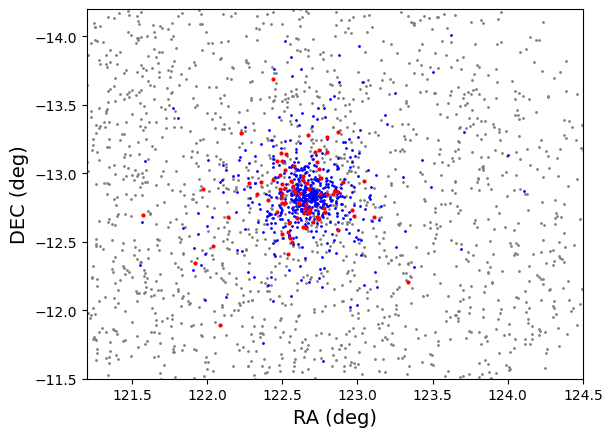

In [13]:
fig, ax = plt.subplots()

ax.scatter(p1.RAJ2000, p1.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p1.iloc[matched_idx_catalog1].RAJ2000, p1.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [14]:
dfvg_t = len(dfvg)
p1_t = len(p1.iloc[matched_idx_catalog1])

Completeness


In [15]:
p1_c = p1_t /dfvg_t
p1_c*100

12.213740458015266

Pureness

In [16]:
p1_p = p1_t/len(p1)
p1_p*100

3.430531732418525

### Population 2

In [17]:
ra1 = p2.RAJ2000
dec1 = p2.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [18]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [19]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [20]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [21]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [22]:
p2

,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
0,123.630068,-14.588920,-2.401,-0.828,19.020638,1.998192,0.6099,1
1,123.738015,-14.533407,-0.930,0.788,19.656456,0.874481,0.6050,1
2,123.761654,-14.519404,-2.041,0.587,20.226347,1.613913,0.7773,1
3,123.751531,-14.479828,-0.419,0.631,19.236961,0.773949,0.7133,1
4,123.787346,-14.495145,-2.089,-0.624,17.267841,1.390625,0.7766,1
...,...,...,...,...,...,...,...,...
2514,124.001035,-11.504373,-2.808,1.306,18.683128,1.328753,0.6188,1
2515,124.153468,-11.509300,-2.763,1.059,18.704103,1.368227,0.5865,1
2516,124.112280,-11.454843,-3.892,-0.311,17.462986,1.342373,0.6170,1
2517,124.079382,-11.460330,-4.262,-0.735,15.883179,0.998085,0.5591,1


In [23]:
p2.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
833,122.516385,-13.965905,-2.239,-0.433,17.050293,1.205120,0.7145,1
846,122.556166,-13.847287,-2.152,-0.728,15.925107,0.902498,0.7071,1
1472,123.708779,-13.305395,-2.255,-0.542,15.023931,0.814781,0.7145,1
1750,123.252097,-13.586993,-2.338,-0.238,12.331991,0.304743,0.6999,1
1766,122.875046,-13.668123,-2.075,-0.386,17.558283,1.399096,0.7324,1
1828,123.198750,-13.358569,-2.266,-0.145,14.299912,0.671442,0.7143,1
1876,122.775155,-13.479977,-2.350,-0.400,13.190701,0.426936,0.6943,1
1881,122.704728,-13.420700,-2.235,-0.493,17.297874,1.362175,0.6883,1
1894,122.613684,-13.354445,-2.496,-0.405,17.577665,1.474958,0.6572,1
1912,122.921408,-13.185990,-2.260,-0.563,17.271206,1.484058,0.6139,1


In [24]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
1110,5725113481983114240,122.516375,-13.965907,0.7145,-2.239,-0.433,17.050293,17.589607,16.384487,NGC_2539,...,0.0589,0.0447,0.0840,PHOENIX,122.516385,-13.965905,1.108167,0.739725,0.0169,0.0
1106,5725116849237274752,122.556156,-13.847291,0.7071,-2.152,-0.728,15.925107,16.289055,15.386557,NGC_2539,...,0.0440,0.0328,0.0539,MARCS,122.556166,-13.847287,0.565617,0.409262,-0.0797,0.0
116,5726467015152440448,123.708769,-13.305398,0.7145,-2.255,-0.542,15.023931,15.347285,14.532504,NGC_2539,...,0.0684,0.0642,0.0735,MARCS,123.708779,-13.305395,0.435173,0.405145,-0.2130,0.0
125,5726619018337860608,123.252087,-13.586994,0.6999,-2.338,-0.238,12.331991,12.442050,12.137307,NGC_2539,...,0.2981,0.2964,0.2996,A,123.252097,-13.586993,0.247601,0.260700,-0.2651,0.0
136,5726626199526265600,122.875036,-13.668124,0.7324,-2.075,-0.386,17.558283,18.167610,16.768515,NGC_2539,...,0.0051,0.0013,0.0144,MARCS,122.875046,-13.668123,1.499826,1.321017,-0.0721,0.0
56,5726661559992252544,123.198740,-13.358569,0.7143,-2.266,-0.145,14.299912,14.556951,13.885509,NGC_2539,...,0.0784,0.0720,0.0906,MARCS,123.198750,-13.358569,0.382769,0.390592,-0.3556,0.0
102,5726679491477381504,122.775145,-13.479979,0.6943,-2.350,-0.400,13.190701,13.337885,12.910949,NGC_2539,...,0.0836,0.0778,0.1015,A,122.775155,-13.479977,0.225723,0.170296,-0.0579,0.0
100,5726680870165439360,122.704717,-13.420703,0.6883,-2.235,-0.493,17.297874,17.915932,16.553757,NGC_2539,...,0.0111,0.0033,0.0238,PHOENIX,122.704728,-13.420700,1.333761,1.016587,0.0593,0.0
87,5726685229554458112,122.613672,-13.354446,0.6572,-2.496,-0.405,17.577665,18.265543,16.790585,NGC_2539,...,0.1043,0.0924,0.1180,MARCS,122.613684,-13.354445,1.387548,1.106300,-0.0592,0.0
460,5726694747202461312,122.921398,-13.185993,0.6139,-2.260,-0.563,17.271206,17.964739,16.480680,NGC_2539,...,0.0242,0.0081,0.0464,PHOENIX,122.921408,-13.185990,1.347161,1.574631,-0.2840,0.0


(121.2, 124.5)

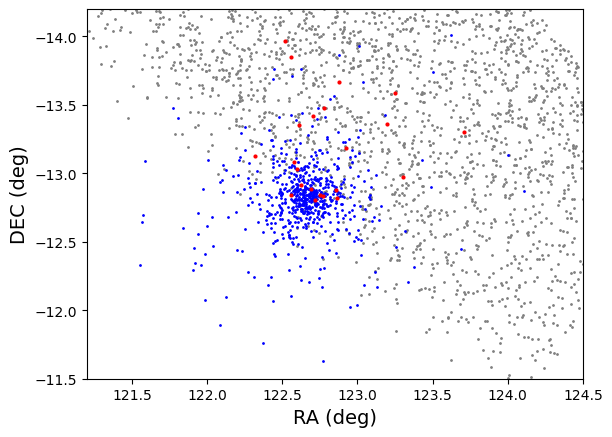

In [25]:
fig, ax = plt.subplots()

ax.scatter(p2.RAJ2000, p2.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p2.iloc[matched_idx_catalog1].RAJ2000, p2.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [26]:
dfvg_t = len(dfvg)
p2_t = len(p2.iloc[matched_idx_catalog1])

Completeness


In [27]:
p2_c = p2_t /dfvg_t
p2_c*100

3.3587786259541987

Pureness

In [28]:
p2_p = p2_t/len(p2)
p2_p*100

0.8733624454148471

### Population 3

In [29]:
ra1 = p3.RAJ2000
dec1 = p3.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [30]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [31]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [32]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [33]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [34]:
p3.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
994,122.549542,-13.242215,-2.293,-0.495,17.439474,1.439741,0.6904,2
1000,122.425783,-13.241584,-2.426,-0.640,17.896448,1.618706,0.6523,2
1008,122.566340,-13.063261,-2.390,-0.574,17.360735,1.407152,0.6964,2
1012,122.629102,-13.021152,-2.574,-0.701,17.576788,1.134357,0.7064,2
1041,122.732003,-12.956316,-2.284,-0.863,15.694387,0.948408,0.7088,2
1042,122.891164,-12.892105,-2.372,-0.769,16.028750,1.034866,0.7001,2
1055,122.891808,-12.773342,-2.355,-0.555,16.953333,1.258804,0.7147,2
1276,122.281611,-13.078198,-2.388,-0.771,16.726223,1.237085,0.7105,2
1285,122.547828,-12.972000,-2.296,-0.400,18.121515,1.711660,0.6307,2
1287,122.618273,-12.986281,-2.328,-0.555,16.592182,1.140615,0.6908,2


In [35]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
452,5726699974179527168,122.549531,-13.242217,0.6904,-2.293,-0.495,17.439474,18.097500,16.657759,NGC_2539,...,0.0407,0.0287,0.0542,MARCS,122.549542,-13.242215,1.213463,0.915606,-0.0147,0.0
446,5726702409422712192,122.425772,-13.241586,0.6523,-2.426,-0.640,17.896448,18.671953,17.053247,NGC_2539,...,0.2026,0.1927,0.2139,PHOENIX,122.425783,-13.241584,1.684238,1.185332,0.0136,0.0
469,5726711175454189184,122.566329,-13.063264,0.6964,-2.390,-0.574,17.360735,18.006016,16.598864,NGC_2539,...,0.0560,0.0414,0.0696,PHOENIX,122.566340,-13.063261,1.409378,1.048687,0.0751,0.0
390,5726713133959248896,122.629090,-13.021155,0.7064,-2.574,-0.701,17.576788,18.012669,16.878311,NGC_2539,...,0.0034,0.0009,0.0083,MARCS,122.629102,-13.021152,1.611261,1.313422,-0.0542,0.0
746,5726737117056577152,122.731993,-12.956319,0.7088,-2.284,-0.863,15.694387,16.071976,15.123568,NGC_2539,...,0.0058,0.0019,0.0115,MARCS,122.732003,-12.956316,0.751961,0.628603,-0.1337,0.0
824,5726738388366836352,122.891153,-12.892108,0.7001,-2.372,-0.769,16.028750,16.463170,15.428303,NGC_2539,...,0.0651,0.0545,0.0748,MARCS,122.891164,-12.892105,0.800007,0.817489,-0.3458,0.0
809,5726746222387159168,122.891797,-12.773345,0.7147,-2.355,-0.555,16.953333,17.514105,16.255300,NGC_2539,...,0.0522,0.0389,0.0655,MARCS,122.891808,-12.773342,1.292477,1.309440,-0.3184,0.0
658,5727458259248762496,122.281601,-13.078202,0.7105,-2.388,-0.771,16.726223,17.267502,16.030416,NGC_2539,...,0.1179,0.0948,0.1365,PHOENIX,122.281611,-13.078198,0.952089,0.616363,0.1082,0.0
620,5727463511987435904,122.547817,-12.972002,0.6307,-2.296,-0.400,18.121515,18.958378,17.246717,NGC_2539,...,0.1671,0.1552,0.1780,PHOENIX,122.547828,-12.972000,2.373614,1.622587,0.0980,0.0
626,5727464031684650112,122.618262,-12.986283,0.6908,-2.328,-0.555,16.592182,17.087688,15.947074,NGC_2539,...,0.0152,0.0068,0.0275,PHOENIX,122.618273,-12.986281,0.926016,0.744968,0.0629,0.0


(121.2, 124.5)

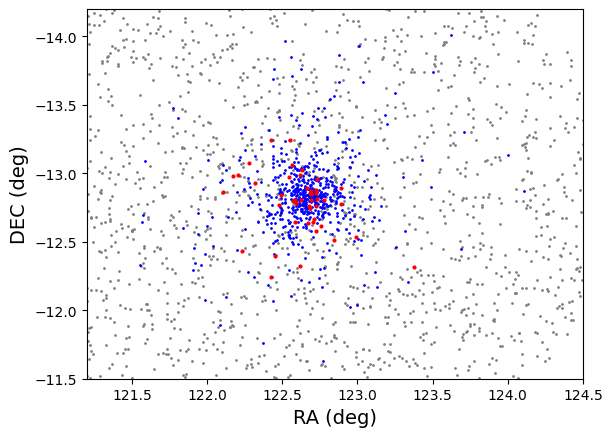

In [36]:
fig, ax = plt.subplots()

ax.scatter(p3.RAJ2000, p3.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p3.iloc[matched_idx_catalog1].RAJ2000, p3.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [37]:
dfvg_t = len(dfvg)
p3_t = len(p3.iloc[matched_idx_catalog1])

Completeness


In [38]:
p3_c = p3_t /dfvg_t
p3_c*100

7.022900763358779

Pureness

In [39]:
p3_p = p3_t/len(p3)
p3_p*100

2.1883920076117986

### Population 4

In [40]:
ra1 = p4.RAJ2000
dec1 = p4.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [41]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [42]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [43]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [44]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [45]:
p4.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
462,121.773480,-13.476245,-2.319,-0.410,16.195013,1.040184,0.7004,3
912,121.568572,-12.644397,-2.301,-0.411,16.337315,1.159345,0.7057,3
1344,121.936630,-12.556276,-1.956,-0.347,13.159049,0.446623,0.6987,3
1401,122.195464,-12.439109,-2.140,-0.620,16.395230,1.114319,0.6904,3
1470,123.045284,-12.185986,-2.157,-0.395,16.639854,1.139764,0.6722,3
1665,121.908635,-12.295745,-2.297,-0.653,15.023970,0.801169,0.7153,3
1756,122.125913,-12.096969,-2.163,-0.385,14.497416,0.678251,0.7248,3
2063,122.369849,-11.763092,-2.345,-0.596,13.256223,0.458415,0.7174,3


In [46]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
1091,5725921623028823552,121.773469,-13.476246,0.7004,-2.319,-0.410,16.195013,16.635645,15.595461,NGC_2539,...,0.0365,0.0272,0.0504,PHOENIX,121.773480,-13.476245,0.658204,0.481726,0.0767,0.0
175,5726233197136458112,121.568561,-12.644399,0.7057,-2.301,-0.411,16.337315,16.830915,15.671571,NGC_2539,...,0.2109,0.1945,0.2333,MARCS,121.568572,-12.644397,0.675254,0.539988,-0.0818,0.0
517,5727550996182095360,121.936621,-12.556277,0.6987,-1.956,-0.347,13.159049,13.323388,12.876765,NGC_2539,...,0.1373,0.1341,0.1427,MARCS,121.936630,-12.556276,0.204810,0.140865,0.0247,0.0
605,5727576216229850880,122.195455,-12.439112,0.6904,-2.140,-0.620,16.395230,16.867811,15.753492,NGC_2539,...,0.0329,0.0207,0.0446,PHOENIX,122.195464,-12.439109,0.716630,0.495162,0.0169,0.0
578,5727622120837646592,123.045274,-12.185987,0.6722,-2.157,-0.395,16.639854,17.124372,15.984609,NGC_2539,...,0.0386,0.0271,0.0502,PHOENIX,123.045284,-12.185986,0.870358,0.902399,-0.2821,0.0
89,5727747052849211136,121.908624,-12.295748,0.7153,-2.297,-0.653,15.023970,15.344985,14.543816,NGC_2539,...,0.0693,0.0601,0.0772,MARCS,121.908635,-12.295745,0.420460,0.258704,0.1416,0.0
429,5727779797680542464,122.125904,-12.096970,0.7248,-2.163,-0.385,14.497416,14.759340,14.081089,NGC_2539,...,0.0595,0.0553,0.0645,MARCS,122.125913,-12.096969,0.352639,0.216830,0.1281,0.0
538,5727883426649794560,122.369838,-11.763095,0.7174,-2.345,-0.596,13.256223,13.424639,12.966224,NGC_2539,...,0.1099,0.1072,0.1123,MARCS,122.369849,-11.763092,0.234162,0.172300,-0.1448,0.0


(121.2, 124.5)

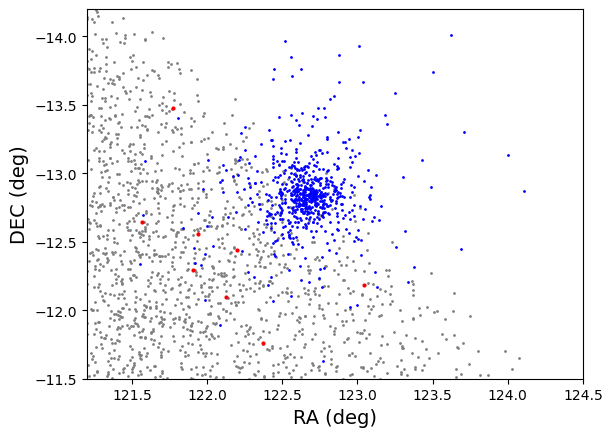

In [47]:
fig, ax = plt.subplots()

ax.scatter(p4.RAJ2000, p4.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p4.iloc[matched_idx_catalog1].RAJ2000, p4.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [48]:
dfvg_t = len(dfvg)
p4_t = len(p4.iloc[matched_idx_catalog1])

Completeness


In [49]:
p4_c = p4_t /dfvg_t
p4_c*100

1.2213740458015268

Pureness

In [50]:
p4_p = p4_t/len(p4)
p4_p*100

0.3104384943733023

### Population 5

In [51]:
ra1 = p5.RAJ2000
dec1 = p5.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [52]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [53]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [54]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [55]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [56]:
p5.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
177,123.007691,-13.927758,-2.426,-0.595,15.580099,0.927096,0.8103,4
366,122.876584,-13.863222,-2.290,-0.747,15.763227,0.965583,0.8040,4
399,122.623236,-13.760112,-2.357,-0.526,17.152250,1.338465,0.7557,4
401,122.565709,-13.713057,-2.385,-0.689,16.258614,1.038034,0.7444,4
461,122.443256,-13.765484,-2.559,-0.370,14.012406,0.635195,0.7389,4
...,...,...,...,...,...,...,...,...
2178,122.952341,-12.025341,-2.562,-0.692,15.204581,0.928051,0.7594,4
2258,121.959984,-12.327115,-2.610,-0.541,12.454536,0.327003,0.8121,4
2267,121.553500,-12.334414,-2.235,-0.591,14.431812,0.689578,0.7795,4
2283,121.987003,-12.075527,-2.378,-0.808,14.231053,0.677933,0.7857,4


In [57]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
29,5724918868422661120,123.007680,-13.927760,0.8103,-2.426,-0.595,15.580099,15.963792,15.036696,NGC_2539,...,0.0647,0.0564,0.0725,MARCS,123.007691,-13.927758,0.529302,0.490049,-0.1401,0.0
22,5725107915705369984,122.876573,-13.863225,0.8040,-2.290,-0.747,15.763227,16.162367,15.196784,NGC_2539,...,0.0146,0.0060,0.0236,MARCS,122.876584,-13.863222,0.654409,0.478973,-0.0070,0.0
1100,5725126401244507904,122.623225,-13.760115,0.7557,-2.357,-0.526,17.152250,17.761162,16.422697,NGC_2539,...,0.0744,0.0603,0.0851,PHOENIX,122.623236,-13.760112,1.097271,0.788785,-0.0369,0.0
1099,5725127462097961728,122.565698,-13.713060,0.7444,-2.385,-0.689,16.258614,16.699545,15.661510,NGC_2539,...,0.0113,0.0044,0.0185,PHOENIX,122.565709,-13.713057,0.726035,0.496656,-0.0433,0.0
13,5725168079608466304,122.443245,-13.765486,0.7389,-2.559,-0.370,14.012406,14.255021,13.619826,NGC_2539,...,0.1246,0.1218,0.1275,MARCS,122.443256,-13.765484,0.274634,0.186572,0.0871,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,5727676203065832960,122.952329,-12.025344,0.7594,-2.562,-0.692,15.204581,15.583778,14.655727,NGC_2539,...,0.0439,0.0314,0.0610,MARCS,122.952341,-12.025341,0.480910,0.450990,-0.1344,0.0
93,5727746052116095360,121.959972,-12.327117,0.8121,-2.610,-0.541,12.454536,12.572279,12.245276,NGC_2539,...,0.1414,0.1377,0.1505,A,121.959984,-12.327115,0.209469,0.130046,0.1436,0.0
1086,5727754611991842304,121.553490,-12.334417,0.7795,-2.235,-0.591,14.431812,14.695847,14.006269,NGC_2539,...,0.0402,0.0325,0.0504,MARCS,121.553500,-12.334414,0.342254,0.263938,-0.1655,0.0
403,5727777839175515520,121.986992,-12.075530,0.7857,-2.378,-0.808,14.231053,14.491918,13.813985,NGC_2539,...,0.0546,0.0497,0.0588,MARCS,121.987003,-12.075527,0.310541,0.183848,0.0440,0.0


(121.2, 124.5)

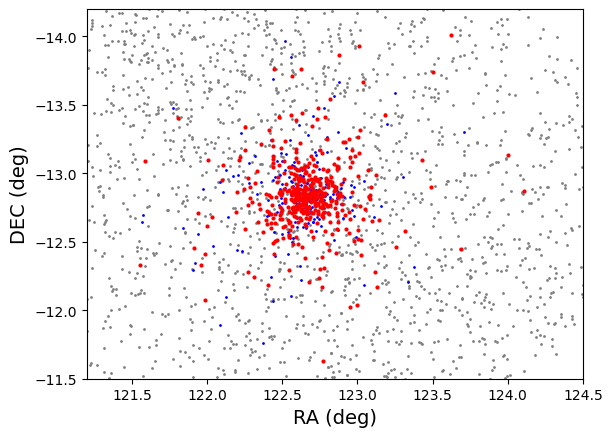

In [58]:
fig, ax = plt.subplots()

ax.scatter(p5.RAJ2000, p5.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p5.iloc[matched_idx_catalog1].RAJ2000, p5.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [59]:
dfvg_t = len(dfvg)
p5_t = len(p5.iloc[matched_idx_catalog1])

Completeness


In [60]:
p5_c = p5_t /dfvg_t
p5_c*100

68.70229007633588

Pureness

In [61]:
p5_p = p5_t/len(p5)
p5_p*100

17.321016166281755

## Analyzing

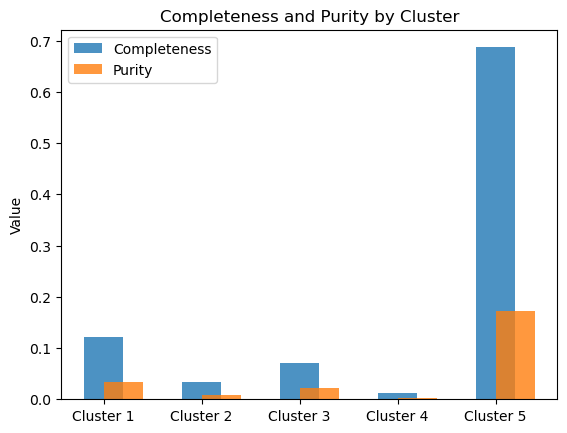

In [62]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3, 4, 5]
completeness = [p1_c, p2_c, p3_c, p4_c, p5_c]  # Exemplo de completude
purity = [p1_p, p2_p, p3_p, p4_p, p5_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("Completeness and Purity by Cluster")
plt.legend()
plt.show()